# Modelovanie č. 3 - popisné modely

## Načítanie knižníc

In [1]:
import matplotlib.pyplot as plt
import hdbscan
import pickle

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Načítanie dát

In [2]:
with open('data/Train_data_preprocessed.pkl', 'rb') as file:
    data = pickle.load(file)

## Predspracovanie dát

In [3]:
quantitative = ['src_bytes', 'dst_bytes', 'hot', 'count', 'serror_rate', 'rerror_rate', 'diff_srv_rate', 'dst_host_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate']

scaler = StandardScaler()
data[quantitative] = scaler.fit_transform(data[quantitative])

features = ['src_bytes', 'dst_bytes']

## Modelovanie

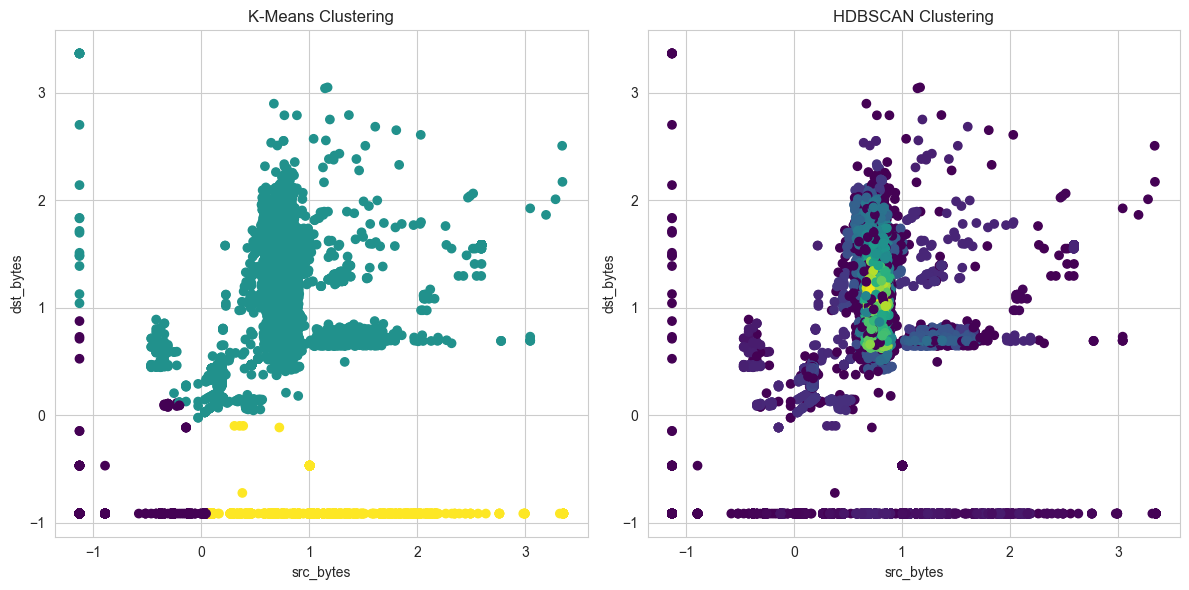

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data[features])

hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=2, gen_min_span_tree=True)
hdbscan_labels = hdbscan_clusterer.fit_predict(data[features])

data['kmeans_cluster'] = kmeans_labels
data['hdbscan_cluster'] = hdbscan_labels

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data['src_bytes'], data['dst_bytes'], c=kmeans_labels, cmap='viridis', marker='o')
plt.title('K-Means Clustering')
plt.xlabel('src_bytes')
plt.ylabel('dst_bytes')

plt.subplot(1, 2, 2)
plt.scatter(data['src_bytes'], data['dst_bytes'], c=hdbscan_labels, cmap='viridis', marker='o')
plt.title('HDBSCAN Clustering')
plt.xlabel('src_bytes')
plt.ylabel('dst_bytes')

plt.tight_layout()
plt.show()